# Modelling CIFAR10 Dataset Using Resnet18 - Use Albumentations & GRADCAM

### The requirements in detail:
  
1. Move your last code's transformations to Albumentations. Apply ToTensor, HorizontalFlip, Normalize (at min) + More (for additional points)
2. Please make sure that your test_transforms are simple and only using ToTensor and Normalize
3. Implement GradCam function as a module. 
4. Your final code (notebook file) must use imported functions to implement transformations and GradCam functionality
5. Target Accuracy is 87%   



## Setup google drive for storage & retrieval

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

module_folder = 'drive/My Drive/eva_stored_from_colab/eva5/cifar10_gradcam/'
github_raw_models_path = "tsai_projects/assignment9_GRADCAM/raw_models"
github_custom_utils_path = "tsai_projects/assignment9_GRADCAM/custom_utils"


base_folder = module_folder+'trained_weights/'
anlt_folder = module_folder+'analysis_materials/'
acc_recorder_files = ["maxAcc_cifar10_gradcam"]
model_file_names = ["mdl_cifar10_gradcam"]

Mounted at /content/drive


## Get module from github & set it up for use

In [7]:
!rm -r tsai_projects/

In [8]:
!git clone  https://github.com/sairamsubramaniam/tsai_projects.git

Cloning into 'tsai_projects'...
remote: Enumerating objects: 345, done.
remote: Counting objects: 100% (345/345), done.
remote: Compressing objects: 100% (228/228), done.
remote: Total 345 (delta 190), reused 266 (delta 114), pack-reused 0
Receiving objects: 100% (345/345), 652.21 KiB | 17.16 MiB/s, done.
Resolving deltas: 100% (190/190), done.


## Import all the required modules including the custom ones

In [9]:
from __future__ import print_function
from operator import itemgetter
import time
import sys
# sys.path.append(module_folder)
sys.path.append("tsai_projects/assignment9_GRADCAM/")

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline

from raw_models import resnets
import custom_utils
from custom_utils import helpers
from custom_utils import analytics
from custom_utils import preprocessors as prep

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

## Download Data

In [10]:
train_loader, test_loader, classes = prep.get_cifar10_loaders(root="./data", device=device, train_batch_size=128)

Files already downloaded and verified
[(0.4913995563983917, 0.48215845227241516, 0.44653093814849854), (0.20230083167552948, 0.19941286742687225, 0.20096157491207123)]
Files already downloaded and verified


## Training Round 1:

In [8]:
fn_idx = 0
epochs = 20

acc_recorder_file = acc_recorder_files[fn_idx]
model_file_name = model_file_names[fn_idx]

accuracy_store_path = base_folder+acc_recorder_file
model_sd_save_path = base_folder+model_file_name+"_sd.pth"

model = resnets.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=0., momentum=0.9)
loss_func = F.cross_entropy


trial1 = helpers.train_epochs(
                    model=model, 
                    device=device, 
                    train_loader=train_loader,
                    test_loader=test_loader, 
                    optimizer=optimizer, 
                    loss_func=loss_func, 
                    epochs=epochs,
                    accuracy_store_path=accuracy_store_path, 
                    model_sd_save_path=model_sd_save_path,
                    save_if_better_acc=True)

  0%|          | 0/391 [00:00<?, ?it/s]


LAST RECORDED MAX ACCURACY:  0.662

EPOCH NUM 1


loss=1.4591140747070312 batch_id=390: 100%|██████████| 391/391 [01:00<00:00,  6.47it/s]


Train Data: Average loss: 0.0139, Accuracy: 17715/50000 (35.4300%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.4806, Accuracy: 4565/10000 (45.6500%)

-----------------------------------------------

EPOCH NUM 2


loss=0.9862531423568726 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Train Data: Average loss: 0.0099, Accuracy: 27005/50000 (54.0100%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1651, Accuracy: 5774/10000 (57.7400%)

-----------------------------------------------

EPOCH NUM 3


loss=0.788343071937561 batch_id=390: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s]


Train Data: Average loss: 0.0075, Accuracy: 32858/50000 (65.7160%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1738, Accuracy: 6066/10000 (60.6600%)

-----------------------------------------------

EPOCH NUM 4


loss=0.9024307131767273 batch_id=390: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]


Train Data: Average loss: 0.0059, Accuracy: 36667/50000 (73.3340%)




Test set: Average loss: 0.8860, Accuracy: 6965/10000 (69.6500%)



  0%|          | 0/391 [00:00<?, ?it/s]

-----------------------------------------------

EPOCH NUM 5


loss=0.7042044401168823 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0047, Accuracy: 39450/50000 (78.9000%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8204, Accuracy: 7156/10000 (71.5600%)

-----------------------------------------------

EPOCH NUM 6


loss=0.5526719093322754 batch_id=390: 100%|██████████| 391/391 [01:04<00:00,  6.03it/s]


Train Data: Average loss: 0.0038, Accuracy: 41570/50000 (83.1400%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6530, Accuracy: 7847/10000 (78.4700%)

-----------------------------------------------

EPOCH NUM 7


loss=0.6045317053794861 batch_id=390: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s]


Train Data: Average loss: 0.0029, Accuracy: 43411/50000 (86.8220%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6239, Accuracy: 7894/10000 (78.9400%)

-----------------------------------------------

EPOCH NUM 8


loss=0.2837565243244171 batch_id=390: 100%|██████████| 391/391 [01:04<00:00,  6.03it/s]


Train Data: Average loss: 0.0023, Accuracy: 44896/50000 (89.7920%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7160, Accuracy: 7859/10000 (78.5900%)

-----------------------------------------------

EPOCH NUM 9


loss=0.36789241433143616 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.02it/s]


Train Data: Average loss: 0.0017, Accuracy: 46193/50000 (92.3860%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7530, Accuracy: 7879/10000 (78.7900%)

-----------------------------------------------

EPOCH NUM 10


loss=0.3486901819705963 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.02it/s]


Train Data: Average loss: 0.0013, Accuracy: 47019/50000 (94.0380%)




Test set: Average loss: 0.7703, Accuracy: 7936/10000 (79.3600%)



  0%|          | 0/391 [00:00<?, ?it/s]

-----------------------------------------------

EPOCH NUM 11


loss=0.2240780144929886 batch_id=390: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s]


Train Data: Average loss: 0.0009, Accuracy: 47953/50000 (95.9060%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9484, Accuracy: 7783/10000 (77.8300%)

-----------------------------------------------

EPOCH NUM 12


loss=0.15492847561836243 batch_id=390: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]


Train Data: Average loss: 0.0007, Accuracy: 48283/50000 (96.5660%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9045, Accuracy: 7829/10000 (78.2900%)

-----------------------------------------------

EPOCH NUM 13


loss=0.11514617502689362 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]


Train Data: Average loss: 0.0006, Accuracy: 48577/50000 (97.1540%)




Test set: Average loss: 0.8785, Accuracy: 8035/10000 (80.3500%)



  0%|          | 0/391 [00:00<?, ?it/s]

-----------------------------------------------

EPOCH NUM 14


loss=0.1074778288602829 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0005, Accuracy: 48931/50000 (97.8620%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8668, Accuracy: 8151/10000 (81.5100%)

-----------------------------------------------

EPOCH NUM 15


loss=0.03450675681233406 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Train Data: Average loss: 0.0004, Accuracy: 49201/50000 (98.4020%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9812, Accuracy: 8088/10000 (80.8800%)

-----------------------------------------------

EPOCH NUM 16


loss=0.009884331375360489 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0003, Accuracy: 49306/50000 (98.6120%)




Test set: Average loss: 0.9287, Accuracy: 8221/10000 (82.2100%)



  0%|          | 0/391 [00:00<?, ?it/s]

-----------------------------------------------

EPOCH NUM 17


loss=0.03155723214149475 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]


Train Data: Average loss: 0.0003, Accuracy: 49394/50000 (98.7880%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9216, Accuracy: 8230/10000 (82.3000%)

-----------------------------------------------

EPOCH NUM 18


loss=0.009362725540995598 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0002, Accuracy: 49511/50000 (99.0220%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9799, Accuracy: 8198/10000 (81.9800%)

-----------------------------------------------

EPOCH NUM 19


loss=0.033470574766397476 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Train Data: Average loss: 0.0002, Accuracy: 49608/50000 (99.2160%)




Test set: Average loss: 1.0341, Accuracy: 8216/10000 (82.1600%)

-----------------------------------------------
TOTAL TRAINING TIME:  1281.8120958805084
LAST 10 EPOCH AVG ACC:  0.80687
LAST 5 EPOCH AVG ACC:  0.81906
MAX ACCURACY:  0.823


## Training Round 2:

In [9]:
fn_idx = 0
epochs = 20

acc_recorder_file = acc_recorder_files[fn_idx]
model_file_name = model_file_names[fn_idx]

accuracy_store_path = base_folder+acc_recorder_file
model_sd_save_path = base_folder+model_file_name+"_sd.pth"

model = resnets.ResNet18().to(device)
model.load_state_dict(torch.load(model_sd_save_path))

optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.0005, momentum=0.9)
loss_func = F.cross_entropy


trial2 = helpers.train_epochs(
                    model=model, 
                    device=device, 
                    train_loader=train_loader,
                    test_loader=test_loader, 
                    optimizer=optimizer, 
                    loss_func=loss_func, 
                    epochs=epochs,
                    accuracy_store_path=accuracy_store_path, 
                    model_sd_save_path=model_sd_save_path,
                    save_if_better_acc=True)

  0%|          | 0/391 [00:00<?, ?it/s]


LAST RECORDED MAX ACCURACY:  0.823

EPOCH NUM 1


loss=0.011424809694290161 batch_id=390: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]


Train Data: Average loss: 0.0001, Accuracy: 49848/50000 (99.6960%)




Test set: Average loss: 0.8159, Accuracy: 8433/10000 (84.3300%)



  0%|          | 0/391 [00:00<?, ?it/s]

-----------------------------------------------

EPOCH NUM 2


loss=0.0012990239774808288 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Train Data: Average loss: 0.0000, Accuracy: 49978/50000 (99.9560%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8033, Accuracy: 8443/10000 (84.4300%)

-----------------------------------------------

EPOCH NUM 3


loss=0.006946958601474762 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Train Data: Average loss: 0.0000, Accuracy: 49985/50000 (99.9700%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7977, Accuracy: 8456/10000 (84.5600%)

-----------------------------------------------

EPOCH NUM 4


loss=0.01467498205602169 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]


Train Data: Average loss: 0.0000, Accuracy: 49994/50000 (99.9880%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7881, Accuracy: 8459/10000 (84.5900%)

-----------------------------------------------

EPOCH NUM 5


loss=0.0007426959928125143 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]


Train Data: Average loss: 0.0000, Accuracy: 49997/50000 (99.9940%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7621, Accuracy: 8472/10000 (84.7200%)

-----------------------------------------------

EPOCH NUM 6


loss=0.0060865506529808044 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Train Data: Average loss: 0.0000, Accuracy: 49998/50000 (99.9960%)




Test set: Average loss: 0.7446, Accuracy: 8480/10000 (84.8000%)



  0%|          | 0/391 [00:00<?, ?it/s]

-----------------------------------------------

EPOCH NUM 7


loss=0.001381761976517737 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]


Train Data: Average loss: 0.0000, Accuracy: 49998/50000 (99.9960%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7318, Accuracy: 8487/10000 (84.8700%)

-----------------------------------------------

EPOCH NUM 8


loss=0.005352317821234465 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0000, Accuracy: 49997/50000 (99.9940%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7190, Accuracy: 8477/10000 (84.7700%)

-----------------------------------------------

EPOCH NUM 9


loss=0.006396033801138401 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0000, Accuracy: 49996/50000 (99.9920%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7034, Accuracy: 8482/10000 (84.8200%)

-----------------------------------------------

EPOCH NUM 10


loss=0.002300871070474386 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Train Data: Average loss: 0.0000, Accuracy: 49998/50000 (99.9960%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6898, Accuracy: 8480/10000 (84.8000%)

-----------------------------------------------

EPOCH NUM 11


loss=0.0038702525198459625 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0000, Accuracy: 49999/50000 (99.9980%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6767, Accuracy: 8492/10000 (84.9200%)

-----------------------------------------------

EPOCH NUM 12


loss=0.001421160763129592 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]


Train Data: Average loss: 0.0000, Accuracy: 49999/50000 (99.9980%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6599, Accuracy: 8485/10000 (84.8500%)

-----------------------------------------------

EPOCH NUM 13


loss=0.002017070073634386 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]


Train Data: Average loss: 0.0000, Accuracy: 49999/50000 (99.9980%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6525, Accuracy: 8503/10000 (85.0300%)

-----------------------------------------------

EPOCH NUM 14


loss=0.0022848150692880154 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]


Train Data: Average loss: 0.0000, Accuracy: 49999/50000 (99.9980%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6420, Accuracy: 8495/10000 (84.9500%)

-----------------------------------------------

EPOCH NUM 15


loss=0.0014524257276207209 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0000, Accuracy: 49999/50000 (99.9980%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6284, Accuracy: 8501/10000 (85.0100%)

-----------------------------------------------

EPOCH NUM 16


loss=0.0006769363535568118 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]


Train Data: Average loss: 0.0000, Accuracy: 49999/50000 (99.9980%)




Test set: Average loss: 0.6203, Accuracy: 8506/10000 (85.0600%)



  0%|          | 0/391 [00:00<?, ?it/s]

-----------------------------------------------

EPOCH NUM 17


loss=0.0029563214629888535 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0000, Accuracy: 49999/50000 (99.9980%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6114, Accuracy: 8512/10000 (85.1200%)

-----------------------------------------------

EPOCH NUM 18


loss=0.0017378667835146189 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]


Train Data: Average loss: 0.0000, Accuracy: 49999/50000 (99.9980%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6016, Accuracy: 8517/10000 (85.1700%)

-----------------------------------------------

EPOCH NUM 19


loss=0.00457729771733284 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]


Train Data: Average loss: 0.0000, Accuracy: 49999/50000 (99.9980%)




Test set: Average loss: 0.5950, Accuracy: 8507/10000 (85.0700%)

-----------------------------------------------
TOTAL TRAINING TIME:  1290.793735742569
LAST 10 EPOCH AVG ACC:  0.8499800000000001
LAST 5 EPOCH AVG ACC:  0.85086
MAX ACCURACY:  0.8517


## Training Round 3

In [6]:
fn_idx = 0
epochs = 20

acc_recorder_file = acc_recorder_files[fn_idx]
model_file_name = model_file_names[fn_idx]

accuracy_store_path = base_folder+acc_recorder_file
model_sd_save_path = base_folder+model_file_name+"_sd.pth"

model = resnets.ResNet18().to(device)
model.load_state_dict(torch.load(model_sd_save_path))

optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.0005, momentum=0.9)
loss_func = F.cross_entropy


trial3 = helpers.train_epochs(
                    model=model, 
                    device=device, 
                    train_loader=train_loader,
                    test_loader=test_loader, 
                    optimizer=optimizer, 
                    loss_func=loss_func, 
                    epochs=epochs,
                    accuracy_store_path=accuracy_store_path, 
                    model_sd_save_path=model_sd_save_path,
                    save_if_better_acc=True)

  0%|          | 0/391 [00:00<?, ?it/s]


LAST RECORDED MAX ACCURACY:  0.8517

EPOCH NUM 1


loss=0.1256607323884964 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Train Data: Average loss: 0.0012, Accuracy: 47727/50000 (95.4540%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5335, Accuracy: 8459/10000 (84.5900%)

-----------------------------------------------

EPOCH NUM 2


loss=0.2863702178001404 batch_id=390: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]


Train Data: Average loss: 0.0010, Accuracy: 48080/50000 (96.1600%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5085, Accuracy: 8554/10000 (85.5400%)

-----------------------------------------------

EPOCH NUM 3


loss=0.14766249060630798 batch_id=390: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]


Train Data: Average loss: 0.0009, Accuracy: 48308/50000 (96.6160%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5000, Accuracy: 8557/10000 (85.5700%)

-----------------------------------------------

EPOCH NUM 4


loss=0.20388689637184143 batch_id=390: 100%|██████████| 391/391 [01:04<00:00,  6.03it/s]


Train Data: Average loss: 0.0008, Accuracy: 48416/50000 (96.8320%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4828, Accuracy: 8572/10000 (85.7200%)

-----------------------------------------------

EPOCH NUM 5


loss=0.11396656930446625 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Train Data: Average loss: 0.0007, Accuracy: 48586/50000 (97.1720%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4678, Accuracy: 8610/10000 (86.1000%)

-----------------------------------------------

EPOCH NUM 6


loss=0.13602080941200256 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Train Data: Average loss: 0.0007, Accuracy: 48697/50000 (97.3940%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4737, Accuracy: 8598/10000 (85.9800%)

-----------------------------------------------

EPOCH NUM 7


loss=0.2463073432445526 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]


Train Data: Average loss: 0.0006, Accuracy: 48859/50000 (97.7180%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4670, Accuracy: 8615/10000 (86.1500%)

-----------------------------------------------

EPOCH NUM 8


loss=0.09360944479703903 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]


Train Data: Average loss: 0.0006, Accuracy: 48906/50000 (97.8120%)




Test set: Average loss: 0.4714, Accuracy: 8641/10000 (86.4100%)

-----------------------------------------------

EPOCH NUM 9


loss=0.18093372881412506 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]


Train Data: Average loss: 0.0006, Accuracy: 48946/50000 (97.8920%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4634, Accuracy: 8602/10000 (86.0200%)

-----------------------------------------------

EPOCH NUM 10


loss=0.0711706280708313 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]


Train Data: Average loss: 0.0005, Accuracy: 49049/50000 (98.0980%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4651, Accuracy: 8622/10000 (86.2200%)

-----------------------------------------------

EPOCH NUM 11


loss=0.03884989768266678 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0005, Accuracy: 49124/50000 (98.2480%)




Test set: Average loss: 0.4588, Accuracy: 8665/10000 (86.6500%)



  0%|          | 0/391 [00:00<?, ?it/s]

-----------------------------------------------

EPOCH NUM 12


loss=0.042600713670253754 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0005, Accuracy: 49131/50000 (98.2620%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4607, Accuracy: 8623/10000 (86.2300%)

-----------------------------------------------

EPOCH NUM 13


loss=0.010221520438790321 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0004, Accuracy: 49260/50000 (98.5200%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4751, Accuracy: 8633/10000 (86.3300%)

-----------------------------------------------

EPOCH NUM 14


loss=0.23130211234092712 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0004, Accuracy: 49254/50000 (98.5080%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4837, Accuracy: 8589/10000 (85.8900%)

-----------------------------------------------

EPOCH NUM 15


loss=0.020992830395698547 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0004, Accuracy: 49292/50000 (98.5840%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4709, Accuracy: 8641/10000 (86.4100%)

-----------------------------------------------

EPOCH NUM 16


loss=0.04346230998635292 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0004, Accuracy: 49338/50000 (98.6760%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4751, Accuracy: 8627/10000 (86.2700%)

-----------------------------------------------

EPOCH NUM 17


loss=0.018577033653855324 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0003, Accuracy: 49369/50000 (98.7380%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4823, Accuracy: 8611/10000 (86.1100%)

-----------------------------------------------

EPOCH NUM 18


loss=0.1243538036942482 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0003, Accuracy: 49423/50000 (98.8460%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4766, Accuracy: 8657/10000 (86.5700%)

-----------------------------------------------

EPOCH NUM 19


loss=0.1764148324728012 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0003, Accuracy: 49390/50000 (98.7800%)




Test set: Average loss: 0.4851, Accuracy: 8629/10000 (86.2900%)

-----------------------------------------------
TOTAL TRAINING TIME:  1285.114547252655
LAST 10 EPOCH AVG ACC:  0.86297
LAST 5 EPOCH AVG ACC:  0.8633
MAX ACCURACY:  0.8665


## Training Round 4

In [11]:
fn_idx = 0
epochs = 20

acc_recorder_file = acc_recorder_files[fn_idx]
model_file_name = model_file_names[fn_idx]

accuracy_store_path = base_folder+acc_recorder_file
model_sd_save_path = base_folder+model_file_name+"_sd.pth"

model = resnets.ResNet18().to(device)
model.load_state_dict(torch.load(model_sd_save_path))

optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=0.0005, momentum=0.9)
loss_func = F.cross_entropy


trial3 = helpers.train_epochs(
                    model=model, 
                    device=device, 
                    train_loader=train_loader,
                    test_loader=test_loader, 
                    optimizer=optimizer, 
                    loss_func=loss_func, 
                    epochs=epochs,
                    accuracy_store_path=accuracy_store_path, 
                    model_sd_save_path=model_sd_save_path,
                    save_if_better_acc=True)

  0%|          | 0/391 [00:00<?, ?it/s]


LAST RECORDED MAX ACCURACY:  0.8665

EPOCH NUM 1


loss=0.02378832921385765 batch_id=390: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]


Train Data: Average loss: 0.0003, Accuracy: 49528/50000 (99.0560%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4561, Accuracy: 8656/10000 (86.5600%)

-----------------------------------------------

EPOCH NUM 2


loss=0.12540724873542786 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]


Train Data: Average loss: 0.0003, Accuracy: 49615/50000 (99.2300%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4570, Accuracy: 8666/10000 (86.6600%)

-----------------------------------------------

EPOCH NUM 3


loss=0.05743278190493584 batch_id=390: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]


Train Data: Average loss: 0.0002, Accuracy: 49637/50000 (99.2740%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4585, Accuracy: 8680/10000 (86.8000%)

-----------------------------------------------

EPOCH NUM 4


loss=0.017764510586857796 batch_id=390: 100%|██████████| 391/391 [01:04<00:00,  6.03it/s]


Train Data: Average loss: 0.0002, Accuracy: 49676/50000 (99.3520%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4547, Accuracy: 8670/10000 (86.7000%)

-----------------------------------------------

EPOCH NUM 5


loss=0.03061923012137413 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Train Data: Average loss: 0.0002, Accuracy: 49727/50000 (99.4540%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4535, Accuracy: 8672/10000 (86.7200%)

-----------------------------------------------

EPOCH NUM 6


loss=0.023129697889089584 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0002, Accuracy: 49794/50000 (99.5880%)




Test set: Average loss: 0.4536, Accuracy: 8685/10000 (86.8500%)

-----------------------------------------------

  0%|          | 0/391 [00:00<?, ?it/s]



EPOCH NUM 7


loss=0.041845545172691345 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]


Train Data: Average loss: 0.0002, Accuracy: 49823/50000 (99.6460%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4569, Accuracy: 8699/10000 (86.9900%)

-----------------------------------------------

EPOCH NUM 8


loss=0.013893604278564453 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0001, Accuracy: 49845/50000 (99.6900%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4581, Accuracy: 8684/10000 (86.8400%)

-----------------------------------------------

EPOCH NUM 9


loss=0.009569039568305016 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]


Train Data: Average loss: 0.0001, Accuracy: 49888/50000 (99.7760%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4614, Accuracy: 8678/10000 (86.7800%)

-----------------------------------------------

EPOCH NUM 10


loss=0.007187944836914539 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]


Train Data: Average loss: 0.0001, Accuracy: 49928/50000 (99.8560%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4607, Accuracy: 8685/10000 (86.8500%)

-----------------------------------------------

EPOCH NUM 11


loss=0.019701113924384117 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]


Train Data: Average loss: 0.0001, Accuracy: 49948/50000 (99.8960%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4608, Accuracy: 8687/10000 (86.8700%)

-----------------------------------------------

EPOCH NUM 12


loss=0.028634846210479736 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]


Train Data: Average loss: 0.0003, Accuracy: 49396/50000 (98.7920%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4575, Accuracy: 8679/10000 (86.7900%)

-----------------------------------------------

EPOCH NUM 13


loss=0.0053518665954470634 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]


Train Data: Average loss: 0.0003, Accuracy: 49432/50000 (98.8640%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4588, Accuracy: 8682/10000 (86.8200%)

-----------------------------------------------

EPOCH NUM 14


loss=0.14797481894493103 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Train Data: Average loss: 0.0003, Accuracy: 49427/50000 (98.8540%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4600, Accuracy: 8679/10000 (86.7900%)

-----------------------------------------------

EPOCH NUM 15


loss=0.01933390274643898 batch_id=390: 100%|██████████| 391/391 [01:04<00:00,  6.03it/s]


Train Data: Average loss: 0.0003, Accuracy: 49412/50000 (98.8240%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4572, Accuracy: 8686/10000 (86.8600%)

-----------------------------------------------

EPOCH NUM 16


loss=0.032239217311143875 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0003, Accuracy: 49460/50000 (98.9200%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4588, Accuracy: 8667/10000 (86.6700%)

-----------------------------------------------

EPOCH NUM 17


loss=0.019233614206314087 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Train Data: Average loss: 0.0003, Accuracy: 49446/50000 (98.8920%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4569, Accuracy: 8669/10000 (86.6900%)

-----------------------------------------------

EPOCH NUM 18


loss=0.08080856502056122 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Train Data: Average loss: 0.0003, Accuracy: 49476/50000 (98.9520%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4564, Accuracy: 8673/10000 (86.7300%)

-----------------------------------------------

EPOCH NUM 19


loss=0.11293084919452667 batch_id=390: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Train Data: Average loss: 0.0003, Accuracy: 49453/50000 (98.9060%)




Test set: Average loss: 0.4555, Accuracy: 8671/10000 (86.7100%)

-----------------------------------------------
TOTAL TRAINING TIME:  1286.0343716144562
LAST 10 EPOCH AVG ACC:  0.86778
LAST 5 EPOCH AVG ACC:  0.86732
MAX ACCURACY:  0.8699


# GRADCAM

In [12]:
import io
import requests
import PIL

resp = requests.get("https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg")
img_bytes = io.BytesIO(resp.content)

img = PIL.Image.open(img_bytes)
new_img = img.resize((224, 224))

In [13]:
from torchvision import models
import torchvision

model = models.resnet50(pretrained=True).cuda()
a = analytics.get_grad_cam_image(img=new_img, model=model, feature_module=model.layer4, target_layers=["2"])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


(224, 224, 3)


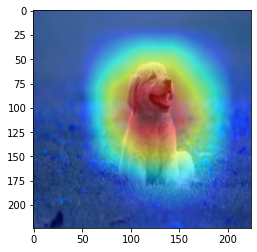

In [15]:
import cv2

# srcBGR = cv2.imread("sample.png")
destRGB = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
print(destRGB.shape)
plt.imshow(destRGB)